# Data labeling agents

This notebook shows how to conduct data labeling tasks using [EDSL](https://docs.expectedparrot.com), an open-source library for simulating surveys, experiments and other research with AI agents and large language models. This workflow consists of the following steps: 

1. Import data into EDSL 
2. Create questions about the data 
3. Design an AI agent to answer the questions
4. Select a language model to generate responses
5. Analyze results as a formatted dataset

This workflow can be visualized as follows:
<br><br>

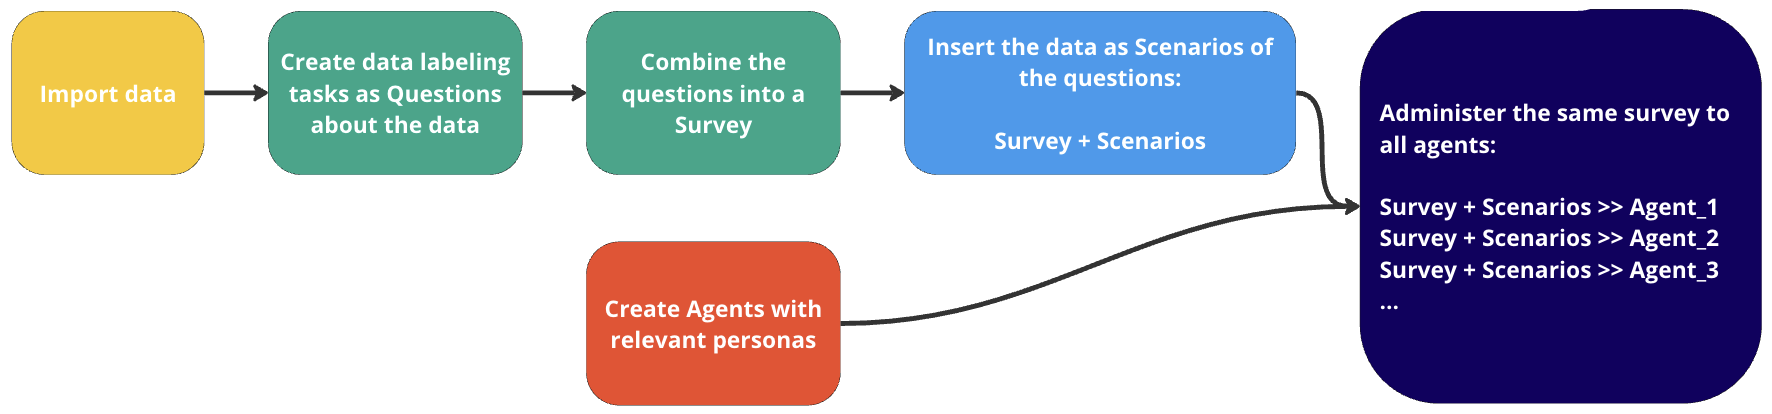

<br><br>

## Conducting agent-specific tasks
We can add a layer of complexity to this generalized flow by creating different AI agents for subsets of the data to be reviewed. For example, we can design agents with specific "expertise" to review only the data that is relevant to that expertise. This can be useful if our data is sorted (or sortable) in some way that is important to our task. We can also use EDSL to prompt a language model to sort the data as needed.

This modified workflow can be visualized as follows:
<br><br>

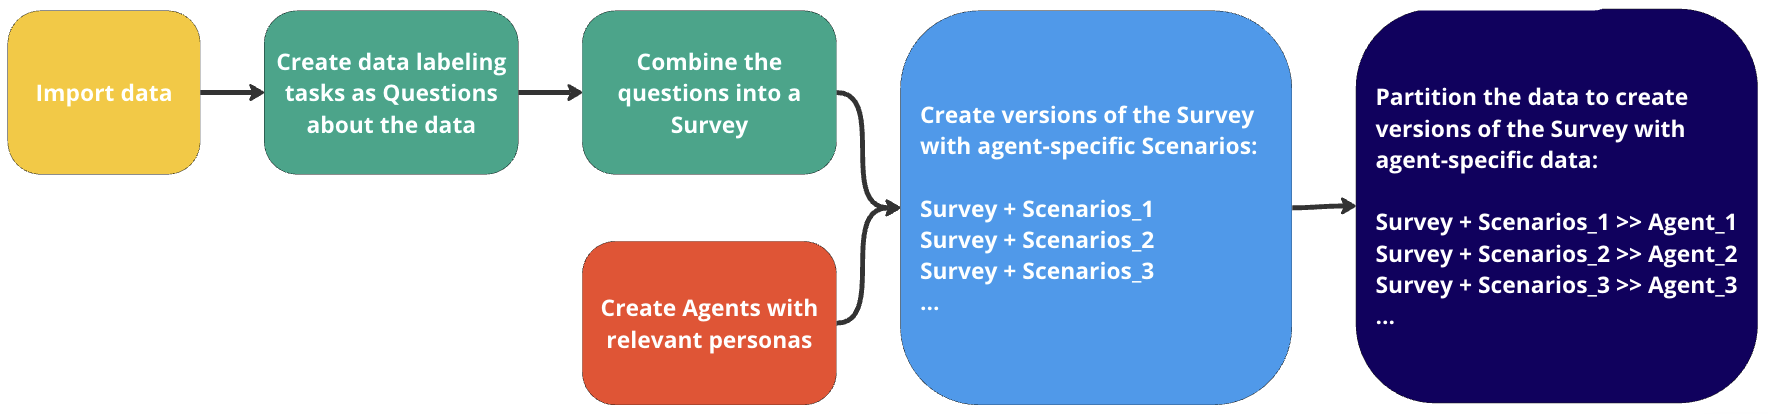

<br><br>

## Example task: Evaluating job posts 
Using a dataset of job posts as an example, in the steps below we create AI agents with expertise in the relevant job categories and then prompt them to evaluate relevant job posts in a variety of ways. The steps are:

1. Import a dataset of job categories and job posts.
2. Construct questions about the job posts and combine them in a survey. 
3. Design AI agents with job category expertise. 
4. Administer the survey to each agent with job posts for the relevant category.
5. Inspect the results using built-in methods for analysis. 

## Technical setup
Before running the code below please ensure that you have completed setup:

* [Install EDSL](https://docs.expectedparrot.com/en/latest/installation.html).
* Create a [Coop account](https://www.expectedparrot.com/login) and activate [remote inference](https://docs.expectedparrot.com/en/latest/remote_inference.html) OR store your own [API Keys](https://docs.expectedparrot.com/en/latest/api_keys.html) for language models that you want to use.

Our [Starter Tutorial](https://docs.expectedparrot.com/en/latest/starter_tutorial.html) provides examples of EDSL basic components. An introductory [data labeling example notebook](https://docs.expectedparrot.com/en/latest/notebooks/data_labeling_example.html) may also be useful to you.

## Import the tools
We start by selecting question types and survey components that we will use.
Please see the [EDSL Docs](https://docs.expectedparrot.com/en/latest/index.html) for examples of all [question types](https://docs.expectedparrot.com/en/latest/questions.html) and details on these basic components.

In [1]:
from edsl import (
    QuestionMultipleChoice, QuestionFreeText, QuestionLinearScale, QuestionList, QuestionNumerical,
    Survey, ScenarioList, Scenario, AgentList, Agent, ModelList, Model
)

## Import data 
Next we import a dataset for review, using `Scenario` objects to represent the individual data that will be added to each of our data labeling questions. 

In [2]:
# job_category,job_title,job_post
# Content Writing,Blog Post Writing,"Looking for a skilled writer to produce 5 blog posts on digital marketing topics. Each post should be 800-1000 words, well-researched, and SEO-optimized."
# Content Writing,Product Description Writing,"We need a writer to craft compelling product descriptions for our online store. Each description should highlight the key features and benefits of the product."
# Content Writing,Technical Writing for Software Documentation,"Seeking an experienced technical writer to create user manuals and API documentation for our software product. Must have a background in tech writing and be familiar with software development terminology."
# Content Writing,Website Copywriting,"Looking for a copywriter to create persuasive content for our company’s website. The content should be clear, concise, and align with our brand voice."
# Content Writing,Press Release Writing,"We need a writer to draft a press release for our upcoming product launch. The release should be attention-grabbing and follow industry standards."
# Digital Marketing,Social Media Management,"We are looking for a social media manager to handle our Instagram and Twitter accounts. Responsibilities include content creation, scheduling posts, and engaging with followers."
# Digital Marketing,SEO Optimization,"Need an SEO expert to optimize our website for search engines. The project includes keyword research, on-page optimization, and link-building strategies."
# Digital Marketing,Google Ads Campaign Management,"Looking for a PPC specialist to manage our Google Ads campaigns. The goal is to increase traffic and conversions for our online store."
# Digital Marketing,Email Marketing Campaign,"Seeking an email marketing expert to design and execute a series of email campaigns for our new product launch. Experience with Mailchimp is preferred."
# Digital Marketing,Content Marketing Strategy,"Seeking a content marketing strategist to develop a comprehensive plan to increase our online visibility. The strategy should include content creation, distribution, and performance tracking."
# Graphic Design,Logo Design for New Startup,"We are a new tech startup looking for a creative designer to create a unique logo for our brand. The logo should be modern and represent innovation. Please provide portfolio examples."
# Graphic Design,Brochure Design,"Looking for an experienced designer to create a professional brochure for our real estate company. The brochure should highlight our services and properties. Must be delivered in print-ready format."
# Graphic Design,Social Media Graphics,"Need a designer to create eye-catching social media graphics for our upcoming campaign. We need a set of 10 images optimized for Instagram and Facebook."
# Graphic Design,Website Banner Design,"Seeking a skilled designer to create a series of banners for our e-commerce website. Banners should be consistent with our brand’s aesthetic. Please include examples of previous work."
# Graphic Design,Infographic Design,"We need a designer to create a visually appealing infographic based on our provided data. The infographic should be easy to understand and shareable on social media."
# Web Development,WordPress Website Setup,"We need a developer to set up a WordPress site for our small business. The site should be responsive and include a contact form, blog, and e-commerce functionality. Experience with WooCommerce is a plus."
# Web Development,Custom Web Application Development,"Looking for a full-stack developer to build a custom web application for managing employee schedules. The app should include a login system, user roles, and reporting features."
# Web Development,Shopify Store Customization,"Seeking a Shopify expert to customize our online store. We need theme adjustments, product page enhancements, and integration with third-party tools."
# Web Development,API Integration,"Need a developer to integrate our existing CRM system with an external API. The integration should sync customer data in real-time. Previous experience with similar projects required."
# Web Development,Landing Page Development,"Looking for a developer to create a high-converting landing page for our marketing campaign. The page should be optimized for mobile and desktop users."

We have stored the file at the Coop and can re-import it:

In [3]:
from edsl.scenarios.FileStore import CSVFileStore

In [4]:
csv_file = CSVFileStore.pull('97ca56a7-4916-4fc4-9bc7-521f134add2b', expected_parrot_url='https://www.expectedparrot.com')

In [5]:
scenarios = ScenarioList.from_csv(csv_file.to_tempfile())

In [6]:
# Code for uploading a CSV to the Coop:

# refresh = False
# if refresh:
#     from edsl.scenarios.FileStore import CSVFileStore
#     fs = CSVFileStore("job_posts.csv")
#     info = fs.push()
#     print(info)

In [7]:
# Alternatively importing a local file:

# scenarios = ScenarioList.from_csv("job_posts.csv")

We can inspect the scenarios that have been created and edit them as desired. [Learn more about working with scenarios](https://docs.expectedparrot.com/en/latest/scenarios.html).

In [8]:
scenarios

ScenarioList([Scenario({'job_category': 'Content Writing', 'job_title': 'Blog Post Writing', 'job_post': 'Looking for a skilled writer to produce 5 blog posts on digital marketing topics. Each post should be 800-1000 words, well-researched, and SEO-optimized.'}), Scenario({'job_category': 'Content Writing', 'job_title': 'Product Description Writing', 'job_post': 'We need a writer to craft compelling product descriptions for our online store. Each description should highlight the key features and benefits of the product.'}), Scenario({'job_category': 'Content Writing', 'job_title': 'Technical Writing for Software Documentation', 'job_post': 'Seeking an experienced technical writer to create user manuals and API documentation for our software product. Must have a background in tech writing and be familiar with software development terminology.'}), Scenario({'job_category': 'Content Writing', 'job_title': 'Website Copywriting', 'job_post': 'Looking for a copywriter to create persuasive content for our company’s website. The content should be clear, concise, and align with our brand voice.'}), Scenario({'job_category': 'Content Writing', 'job_title': 'Press Release Writing', 'job_post': 'We need a writer to draft a press release for our upcoming product launch. The release should be attention-grabbing and follow industry standards.'}), Scenario({'job_category': 'Digital Marketing', 'job_title': 'Social Media Management', 'job_post': 'We are looking for a social media manager to handle our Instagram and Twitter accounts. Responsibilities include content creation, scheduling posts, and engaging with followers.'}), Scenario({'job_category': 'Digital Marketing', 'job_title': 'SEO Optimization', 'job_post': 'Need an SEO expert to optimize our website for search engines. The project includes keyword research, on-page optimization, and link-building strategies.'}), Scenario({'job_category': 'Digital Marketing', 'job_title': 'Google Ads Campaign Management', 'job_post': 'Looking for a PPC specialist to manage our Google Ads campaigns. The goal is to increase traffic and conversions for our online store.'}), Scenario({'job_category': 'Digital Marketing', 'job_title': 'Email Marketing Campaign', 'job_post': 'Seeking an email marketing expert to design and execute a series of email campaigns for our new product launch. Experience with Mailchimp is preferred.'}), Scenario({'job_category': 'Digital Marketing', 'job_title': 'Content Marketing Strategy', 'job_post': 'Seeking a content marketing strategist to develop a comprehensive plan to increase our online visibility. The strategy should include content creation, distribution, and performance tracking.'}), Scenario({'job_category': 'Graphic Design', 'job_title': 'Logo Design for New Startup', 'job_post': 'We are a new tech startup looking for a creative designer to create a unique logo for our brand. The logo should be modern and represent innovation. Please provide portfolio examples.'}), Scenario({'job_category': 'Graphic Design', 'job_title': 'Brochure Design', 'job_post': 'Looking for an experienced designer to create a professional brochure for our real estate company. The brochure should highlight our services and properties. Must be delivered in print-ready format.'}), Scenario({'job_category': 'Graphic Design', 'job_title': 'Social Media Graphics', 'job_post': 'Need a designer to create eye-catching social media graphics for our upcoming campaign. We need a set of 10 images optimized for Instagram and Facebook.'}), Scenario({'job_category': 'Graphic Design', 'job_title': 'Website Banner Design', 'job_post': 'Seeking a skilled designer to create a series of banners for our e-commerce website. Banners should be consistent with our brand’s aesthetic. Please include examples of previous work.'}), Scenario({'job_category': 'Graphic Design', 'job_title': 'Infographic Design', 'job_post': 'We need a designer to create a visually appealing infographic based on our provided data. The infograph

## Construct questions about the data
Next we construct questions to ask about the job posts, selecting question types based on the form of the response that we want to get back from the language model (multiple choice, linear scale, free text, numerical, etc.--see [examples of all question types](https://docs.expectedparrot.com/en/latest/questions.html)). We include a `{{ placeholder }}` for the scenario keys in order to parameterize each question with each job post and category when we run the survey:

In [9]:
q_skills = QuestionList(
    question_name="skills",
    question_text="""
    Consider the following job category and job post at an online labor marketplace. 
    Job category: {{ job_category }}
    Job post: {{ job_post }}
    What are some key skills required for this job?
    """,
)

q_experience = QuestionMultipleChoice(
    question_name="experience",
    question_text="""
    Consider the following job category and job post at an online labor marketplace. 
    Job category: {{ job_category }}
    Job post: {{ job_post }}
    What level of experience is required for this job?
    """,
    question_options=["Entry-level", "Mid-level", "Senior-level"],
)

q_days = QuestionNumerical(
    question_name="days",
    question_text="""
    Consider the following job category and job post at an online labor marketplace. 
    Job category: {{ job_category }}
    Job post: {{ job_post }}
    Estimate the number of days until this job post is fulfilled.
    """,
)

## Combining questions into a Survey
Next we combine our questions into a survey that will be administered to the AI agents. By default, the questions will be administered asynchronously. If desired, we can also specify survey rules (skip/stop logic) and within-survey memories of prior questions and responses. See the EDSL Docs for details on methods for [applying survey rules](https://docs.expectedparrot.com/en/latest/surveys.html#applying-survey-rules).

In [10]:
survey = Survey(questions=[q_skills, q_experience, q_days])

## Creating personas for Agents
Next we draft personas for AI agents that will answer the questions. For each job category we construct an AI agent that is an expert in the category. Agents are constructed by passing a dictionary of `traits` to an `Agent` object. [Learn more about designing AI agents](https://docs.expectedparrot.com/en/latest/agents.html) to answer surveys.

To get the set of job categories from the scenarios:

In [11]:
job_categories = list(set(scenarios.select("job_category").to_list()))
job_categories

['Content Writing', 'Digital Marketing', 'Web Development', 'Graphic Design']

Next we use them to create an agent for each job category:

In [12]:
agents = AgentList(
    Agent(
        traits = {
            "persona": "You are an experienced freelancer on online labor marketplaces.",
            "job_category": job_category,
            "expertise": f"You regularly perform jobs in the following category: {job_category}."
        }
    ) for job_category in job_categories
)
agents

AgentList([Agent(traits = {'persona': 'You are an experienced freelancer on online labor marketplaces.', 'job_category': 'Content Writing', 'expertise': 'You regularly perform jobs in the following category: Content Writing.'}), Agent(traits = {'persona': 'You are an experienced freelancer on online labor marketplaces.', 'job_category': 'Digital Marketing', 'expertise': 'You regularly perform jobs in the following category: Digital Marketing.'}), Agent(traits = {'persona': 'You are an experienced freelancer on online labor marketplaces.', 'job_category': 'Web Development', 'expertise': 'You regularly perform jobs in the following category: Web Development.'}), Agent(traits = {'persona': 'You are an experienced freelancer on online labor marketplaces.', 'job_category': 'Graphic Design', 'expertise': 'You regularly perform jobs in the following category: Graphic Design.'})])

## Selecting language models
EDSL works with many popular language models that we can select to generate the agents' responses to the survey. We can check a current list of available models:

In [13]:
from edsl import Model

# Model.available()

If we do not specify a model to use, GPT 4 preview is used by default. Here we create a `Model` for GPT 4o that we will add to the survey when we run it:

In [14]:
model = Model("gpt-4o")

## Running the survey
We administer a survey by appending the components with the `by()` method and then calling `run()` method. In the simplest case where we want a single agent or list of agents to answer all questions with the same scenarios, this takes the following form:

`results = survey.by(scenarios).by(agents).by(models).run()`

Here we have individual agents answer the questions only for category-specific job posts:

In [15]:
results = {}

for job_category in job_categories:
    
    # Create an agent for the job category
    a = agents.filter(f"job_category == '{job_category}'")
    
    # Filter the relevant scenarios
    s = scenarios.filter(f"job_category == '{job_category}'")

    # Run the survey with the agent and scenarios
    job_category_results = survey.by(s).by(a).run()

    # Store the results
    results[job_category] = job_category_results

## Accessing Results
In the previous step we created independent `Results` objects for our individual agents' survey results. In the next steps we show how to access results with built-in print and analytical methods.

We can identify the column names to select the fields that we want to inspect:

In [16]:
results.keys()

dict_keys(['Content Writing', 'Digital Marketing', 'Web Development', 'Graphic Design'])

In [17]:
results["Graphic Design"].columns

['agent.agent_instruction',
 'agent.agent_name',
 'agent.expertise',
 'agent.persona',
 'answer.days',
 'answer.experience',
 'answer.skills',
 'comment.days_comment',
 'comment.experience_comment',
 'comment.skills_comment',
 'generated_tokens.days_generated_tokens',
 'generated_tokens.experience_generated_tokens',
 'generated_tokens.skills_generated_tokens',
 'iteration.iteration',
 'model.frequency_penalty',
 'model.logprobs',
 'model.max_tokens',
 'model.model',
 'model.presence_penalty',
 'model.temperature',
 'model.top_logprobs',
 'model.top_p',
 'prompt.days_system_prompt',
 'prompt.days_user_prompt',
 'prompt.experience_system_prompt',
 'prompt.experience_user_prompt',
 'prompt.skills_system_prompt',
 'prompt.skills_user_prompt',
 'question_options.days_question_options',
 'question_options.experience_question_options',
 'question_options.skills_question_options',
 'question_text.days_question_text',
 'question_text.experience_question_text',
 'question_text.skills_question_te

We can select individual fields in a variety of ways:

In [18]:
(
    results["Graphic Design"]
    .select("job_post", "skills", "experience", "days")
    .print(format="rich")
)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ scenario                                   ┃ answer                                      ┃ answer      ┃ answer ┃
┃ .job_post                                  ┃ .skills                                     ┃ .experience ┃ .days  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ We are a new tech startup looking for a    │ ['Creativity', 'Logo Design', 'Branding',   │ Mid-level   │ 3.5    │
│ creative designer to create a unique logo  │ 'Adobe Illustrator', 'Portfolio             │             │        │
│ for our brand. The logo should be modern   │ Presentation']                              │             │        │
│ and represent innovation. Please provide   │                                             │             │        │
│ portfolio examples.                        │                                             │             │        │
├────────────────────────────────────────────┼─────────────────────────────────────────────┼─────────────┼────────┤
│ Looking for an experienced designer to     │ ['Adobe InDesign', 'Adobe Photoshop',       │ Mid-level   │ 5      │
│ create a professional brochure for our     │ 'Adobe Illustrator', 'Typography', 'Layout  │             │        │
│ real estate company. The brochure should   │ Design', 'Print Design']                    │             │        │
│ highlight our services and properties.     │                                             │             │        │
│ Must be delivered in print-ready format.   │                                             │             │        │
├────────────────────────────────────────────┼─────────────────────────────────────────────┼─────────────┼────────┤
│ Need a designer to create eye-catching     │ ['Adobe Photoshop', 'Adobe Illustrator',    │ Mid-level   │ 5      │
│ social media graphics for our upcoming     │ 'Social Media Marketing', 'Creativity',     │             │        │
│ campaign. We need a set of 10 images       │ 'Attention to Detail', 'Typography']        │             │        │
│ optimized for Instagram and Facebook.      │                                             │             │        │
├────────────────────────────────────────────┼─────────────────────────────────────────────┼─────────────┼────────┤
│ Seeking a skilled designer to create a     │ ['Graphic design', 'Brand consistency',     │ Mid-level   │ 3      │
│ series of banners for our e-commerce       │ 'Banner design', 'Adobe Creative Suite      │             │        │
│ website. Banners should be consistent with │ proficiency', 'Attention to detail',        │             │        │
│ our brand’s aesthetic. Please include      │ 'Portfolio of previous work']               │             │        │
│ examples of previous work.                 │                                             │             │        │
├────────────────────────────────────────────┼─────────────────────────────────────────────┼─────────────┼────────┤
│ We need a designer to create a visually    │ ['Data Visualization', 'Adobe Illustrator', │ Mid-level   │ 3      │
│ appealing infographic based on our         │ 'Creativity', 'Attention to Detail',        │             │        │
│ provided data. The infographic should be   │ 'Social Media Design']                      │             │        │
│ easy to understand and shareable on social │                                             │             │        │
│ media.                                     │                                             │             │        │
└────────────────────────────────────────────┴─────────────────────────────────────────────┴─────────────┴────────┘

We can apply some labels to our table for readability. Note that each question field also automatically includes a `<question>_comment` field for any commentary by the LLM on the question:

In [19]:
(
    results["Graphic Design"]
    .select("job_post", "experience", "experience_comment")
    .print(
        pretty_labels={
            "scenario.job_post": "Job post description",
            "answer.experience": "Experience level",
            "answer.experience_comment": "Comment",
        }
    )
)

We can also access results as a SQL table (called `self`) with the `.sql()` method, choosing between a "wide" horizontal view of all fields and a "long" vertical view, and optionally removing the column name prefixes 'agent', 'model', 'prompt', etc.:

In [20]:
results["Graphic Design"].sql("select * from self", shape="long")

id         data_type                          key  \
0     0             agent                      persona   
1     0             agent                 job_category   
2     0             agent                    expertise   
3     0             agent                   agent_name   
4     0             agent            agent_instruction   
..   ..               ...                          ...   
245   4           comment           experience_comment   
246   4           comment                 days_comment   
247   4  generated_tokens      skills_generated_tokens   
248   4  generated_tokens  experience_generated_tokens   
249   4  generated_tokens        days_generated_tokens   

                                                 value  
0    You are an experienced freelancer on online la...  
1                                       Graphic Design  
2    You regularly perform jobs in the following ca...  
3                                              Agent_0  
4    You are answering questions as if you were a h...  
..                                                 ...  
245  This job requires a designer who can interpret...  
246  // Based on my experience, a straightforward i...  
247  ["Data Visualization", "Adobe Illustrator", "C...  
248  Mid-level\n\nThis job requires a designer who ...  
249  3\n// Based on my experience, a straightforwar...  

[250 rows x 4 columns]

## Posting content at the Coop
We can post any EDSL objects to the Coop, including this notebook:

In [21]:
agents.push(description = "Agents for job posts data labeling task", visibility = "public")

{'description': 'Agents for job posts data labeling task',
 'object_type': 'agent_list',
 'url': 'https://www.expectedparrot.com/content/90131f79-74db-42d0-b2e0-a9c938366e07',
 'uuid': '90131f79-74db-42d0-b2e0-a9c938366e07',
 'version': '0.1.33.dev1',
 'visibility': 'public'}

In [22]:
survey.push(description = "Survey for job posts data labeling task", visibility = "public")

{'description': 'Survey for job posts data labeling task',
 'object_type': 'survey',
 'url': 'https://www.expectedparrot.com/content/89fd522c-33f4-43c5-abdf-548f5c0d6cef',
 'uuid': '89fd522c-33f4-43c5-abdf-548f5c0d6cef',
 'version': '0.1.33.dev1',
 'visibility': 'public'}

In [23]:
for job_category in job_categories:
    results[job_category].push(description = f"Results for job posts data labeling task: {job_category}", visibility = "public")

In [24]:
from edsl import Notebook

In [25]:
n = Notebook(path = "data_labeling_agent.ipynb")

In [26]:
n.push(description = "Example code for data labeling using agents", visibility = "public")

{'description': 'Example code for data labeling using agents',
 'object_type': 'notebook',
 'url': 'https://www.expectedparrot.com/content/d6574805-6d17-4768-ad96-25d3419ae42b',
 'uuid': 'd6574805-6d17-4768-ad96-25d3419ae42b',
 'version': '0.1.33.dev1',
 'visibility': 'public'}

To update an object:

In [27]:
n = Notebook(path = "data_labeling_agent.ipynb") # resave

In [28]:
n.patch(uuid = "d6574805-6d17-4768-ad96-25d3419ae42b", value = n)

{'status': 'success'}

Learn more about [using the Coop](https://docs.expectedparrot.com/en/latest/coop.html) to conduct LLM-based research.